In [41]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
fake = pd.read_csv('Fake.csv', parse_dates=['date'])
true = pd.read_csv('True.csv', parse_dates=['date'])

fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25
...,...,...,...,...
23445,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16
23446,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16
23447,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15
23448,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14


fake date column is not parsing correctly, possibly means that there are non date-values in the column

Some of the dates are marked as URLs. Given the size of the fake dataset overall, we will be dropping these columns

In [3]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22


In [4]:
#create a target column for each dataset. 0 = Fake News, 1 = Real News
fake['news type'] = 0
true['news type'] = 1

In [5]:
#concat dataframes into one dataset
news = pd.concat([fake, true], ignore_index = True)
news

,title,text,subject,date,news type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
...,...,...,...,...,...
44862,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1
44863,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1
44864,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1
44865,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1


## EDA

In [6]:
#check no.of entries
news.shape

(44867, 5)

In [7]:
#check null columns
news.isnull().sum()

title        0
text         0
subject      0
date         0
news type    0
dtype: int64

In [8]:
#how many unique subjects based on whether they are real or fake news
news[news['news type'] == 0]['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [9]:
news[news['news type'] == 1]['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

Seems like the subject categories are not consistent between the real and fake news sources. likely means that we either need to restandardize or not use that feature in particular

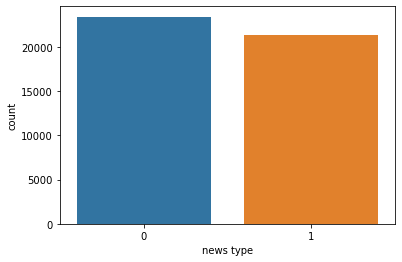

In [10]:
sns.countplot(x = 'news type', data = news)

In [11]:
news['news type'].value_counts(normalize = True)

0    0.522656
1    0.477344
Name: news type, dtype: float64

In [12]:
news['news type'].value_counts()

0    23450
1    21417
Name: news type, dtype: int64

In [13]:
news

,title,text,subject,date,news type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
...,...,...,...,...,...
44862,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1
44863,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1
44864,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1
44865,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1


Dataset is pretty evenly split between Real and Fake news. We have slightly more data points for Fake news vs real.

In [23]:
#create columns for twitter handles

# news['title_twt'] = news['title'].apply(lambda x:set(re.findall('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',x))) 
# news['text_twt'] = news['text'].apply(lambda x:set(re.findall('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',x)))

news['title_twt'] = "" 
news['text_twt'] = ""

In [25]:
temp = 0
z = 0


for i in news['text'] :
    temp = re.findall('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',i)
    if len(temp) > 0:
        news['text_twt'].iloc[z] = set(temp)
        z += 1
    else :
        news['text_twt'].iloc[z] = ""
        z += 1

C:\Users\Faizal Rahman\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
temp = 0
z = 0


for i in news['title'] :
    temp = re.findall('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',i)
    if len(temp) > 0:
        news['title_twt'].iloc[z] = set(temp)
        z += 1
    else :
        news['title_twt'].iloc[z] = ""
        z += 1

In [31]:
twt = news[news['text_twt'].map(len) > 0]
twt

,title,text,subject,date,news type,title_twt,text_twt
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,,"{rainyday80, WendyWhistles, marlene399, Talber..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,,"{kirkketchum, ChrisCJackson, ikebarinholtz, Pe..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,,"{tw1trsux, timrpeterson, pbump}"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,2017-12-23,0,,"{FoxNews, realDonaldTrump}"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,2017-12-22,0,,"{JohnBrennan, realDonaldTrump}"
...,...,...,...,...,...,...,...
43165,Factbox: Trump on Twitter (September 18) - CIA...,The following statements were posted to the ve...,worldnews,2017-09-19,1,,"{AntonioGuterres, EmmanuelMacron, CIA, realDon..."
43224,Factbox: Trump on Twitter (Sept 18) - U.S. Air...,The following statements were posted to the ve...,worldnews,2017-09-18,1,,"{CIA, USAirForce, POTUS, realDonaldTrump}"
43248,China Communist Party complains about 'fabrica...,BEIJING (Reuters) - The youth wing of China s ...,worldnews,2017-09-18,1,,"{ComYouthLeague, ccylchina}"
43280,Factbox: What Trump has said about the United ...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,2017-09-17,1,,{Israel}


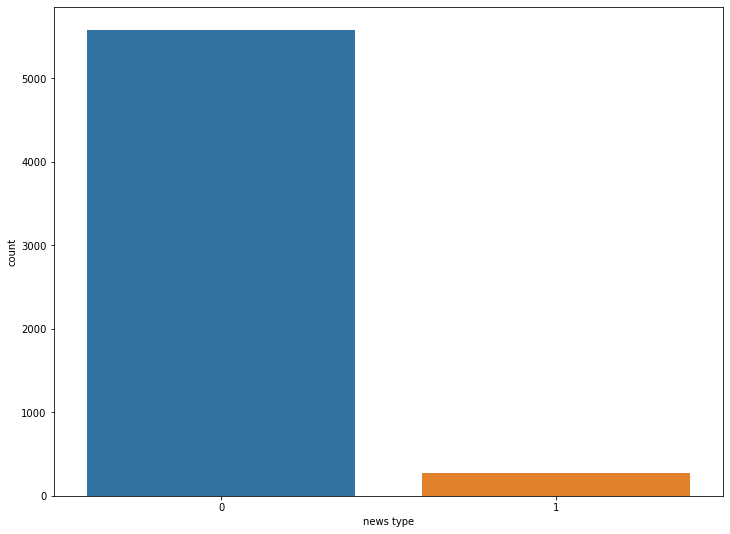

In [35]:
plt.figure(figsize=(12,9))
sns.countplot(x="news type", data=twt)

- News articles containing twitter handles are significantly more likely to be fake news rather than real news. 
- This presents a problem when creating the model, as the model will develop biases towards news articles with twitter handles

In [36]:
twt['handles_count'] = twt['text_twt'].map(len)

<ipython-input-36-0fca321d2055>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt['handles_count'] = twt['text_twt'].map(len)


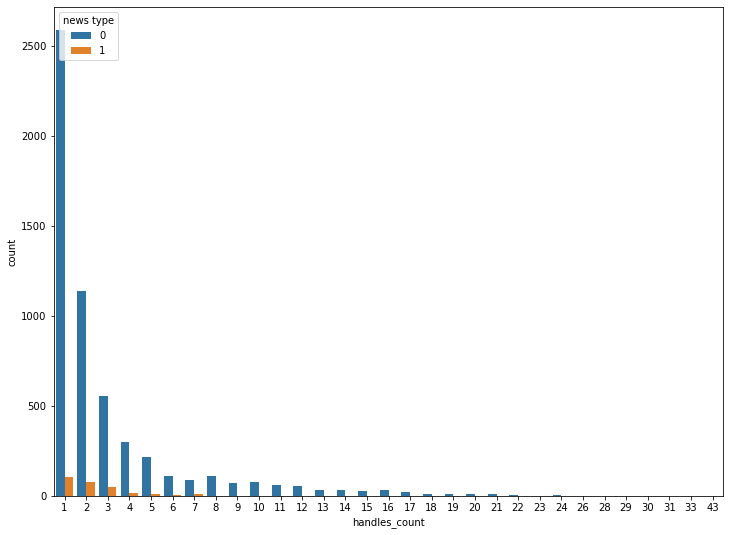

In [38]:
plt.figure(figsize=(12,9))
sns.countplot(x="handles_count", hue='news type', data=twt)

## Unsupervised Learning EDA

In [40]:
news

,title,text,subject,date,news type,title_twt,text_twt
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,,"{rainyday80, WendyWhistles, marlene399, Talber..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,,
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,,"{kirkketchum, ChrisCJackson, ikebarinholtz, Pe..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,,"{tw1trsux, timrpeterson, pbump}"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,,
...,...,...,...,...,...,...,...
44862,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1,,
44863,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1,,
44864,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1,,
44865,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1,,


## Modelling

- For the purposes of this analysis, we will use the text field, and make some minor data cleansing in order to predict whether it is fake or real news
- Will also be interesting to see the accuracy rating based on the title of the article alone, to see whether using that can allow for prediction of articles just as good

In [95]:
#train test split

X = news['text']
y = news['news type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


In [96]:
#write function to clean text data, set to lower case, remove extra spaces

def clean(data) :
    cleaned = []
    
    for i in data :
        i = i.lower()
        i = re.sub('https?://\S+|www\.\S+', '', i)
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        cleaned.append(i)
    return cleaned

X_train = clean(X_train)
X_test = clean(X_test)


In [97]:
#tokenize text
nwords = 10000
tokenizer = Tokenizer(num_words = nwords)
tokenizer.fit_on_texts(X_train)

In [98]:
#convert text to vectors, as the model only accepts numerical data

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [99]:
#add padding to achieve the same length for each article
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)


In [100]:
#build the RNN

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(nwords, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
________________________________________________

In [105]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True)

Epoch 1/10
1077/1077 [==============================] - 199s 185ms/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0417 - val_accuracy: 0.9916
Epoch 2/10
1077/1077 [==============================] - 202s 188ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0394 - val_accuracy: 0.9855
Epoch 3/10
1077/1077 [==============================] - 200s 185ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0551 - val_accuracy: 0.9908
Epoch 4/10
1077/1077 [==============================] - 202s 188ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0523 - val_accuracy: 0.9903
Epoch 5/10
1077/1077 [==============================] - 201s 186ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0640 - val_accuracy: 0.9900
Epoch 6/10
1077/1077 [==============================] - 203s 188ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0776 - val_accuracy: 0.9883
Epoch 7/10
1077/1077 [==============================] - 197s 183ms/step - loss: 0.0026 - accuracy: 0.9995 - val_

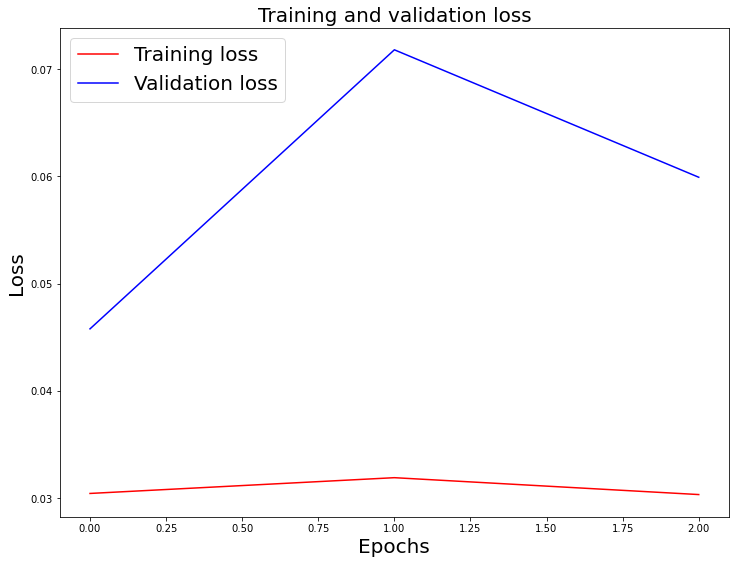

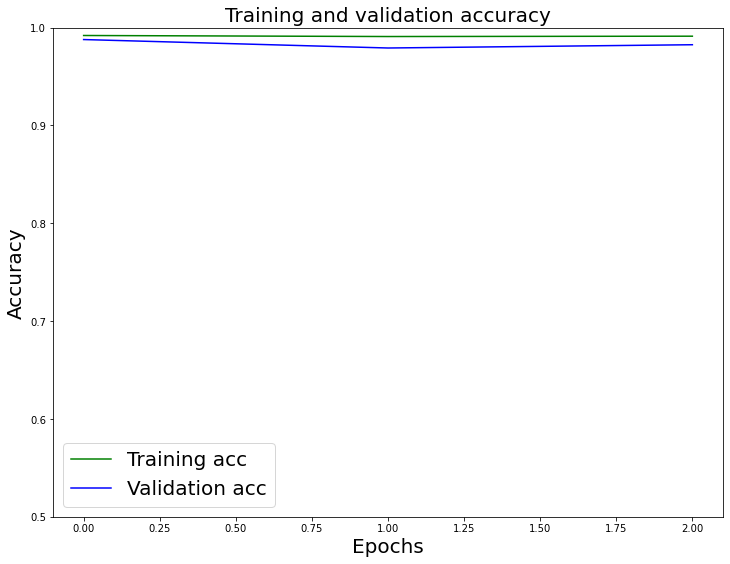

In [103]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [40]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 14s 49ms/step - loss: 0.0439 - accuracy: 0.9910


[0.043881241232156754, 0.990973949432373]

In [41]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [42]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9909739246712725
Precision on testing set: 0.9885687068349607
Recall on testing set: 0.9921128107074569


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

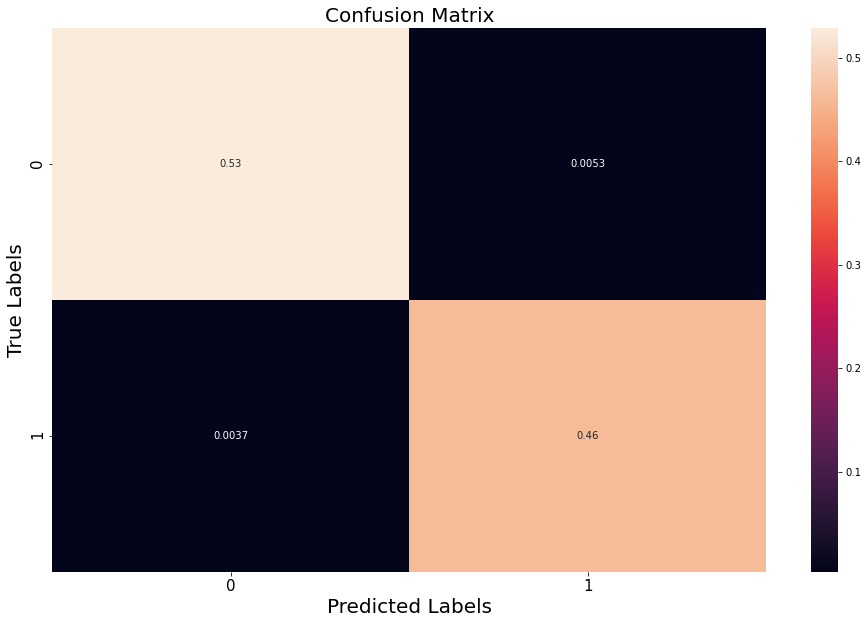

In [43]:
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)


In [44]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


In [45]:
word_index = list(tokenizer.word_index.keys())
word_index = word_index[:nwords-1]

## Modelling - Article Titles Only

In [47]:
#train test split

X = news['title']
y = news['news type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

X_train = clean(X_train)
X_test = clean(X_test)



In [48]:
#tokenize text
nwords = 10000
tokenizer = Tokenizer(num_words = nwords)
tokenizer.fit_on_texts(X_train)

In [49]:
#convert text to vectors, as the model only accepts numerical data

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

#add padding to achieve the same length for each article
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)


In [50]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True)

Epoch 1/10
1077/1077 [==============================] - 159s 148ms/step - loss: 0.4473 - accuracy: 0.8075 - val_loss: 0.1737 - val_accuracy: 0.9318
Epoch 2/10
1077/1077 [==============================] - 159s 148ms/step - loss: 0.1245 - accuracy: 0.9558 - val_loss: 0.1285 - val_accuracy: 0.9521
Epoch 3/10
1077/1077 [==============================] - 262s 243ms/step - loss: 0.0775 - accuracy: 0.9753 - val_loss: 0.1022 - val_accuracy: 0.9624
Epoch 4/10
1077/1077 [==============================] - 184s 171ms/step - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.1040 - val_accuracy: 0.9649
Epoch 5/10
1077/1077 [==============================] - 187s 174ms/step - loss: 0.0393 - accuracy: 0.9884 - val_loss: 0.1079 - val_accuracy: 0.9641
Epoch 6/10
1077/1077 [==============================] - 453s 420ms/step - loss: 0.0282 - accuracy: 0.9917 - val_loss: 0.1164 - val_accuracy: 0.9652
Epoch 7/10
1077/1077 [==============================] - 155s 144ms/step - loss: 0.0222 - accuracy: 0.9931 - val_

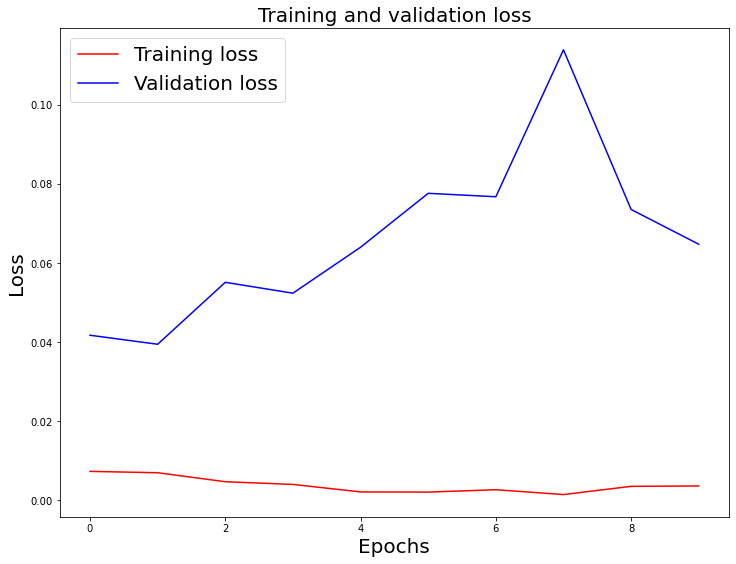

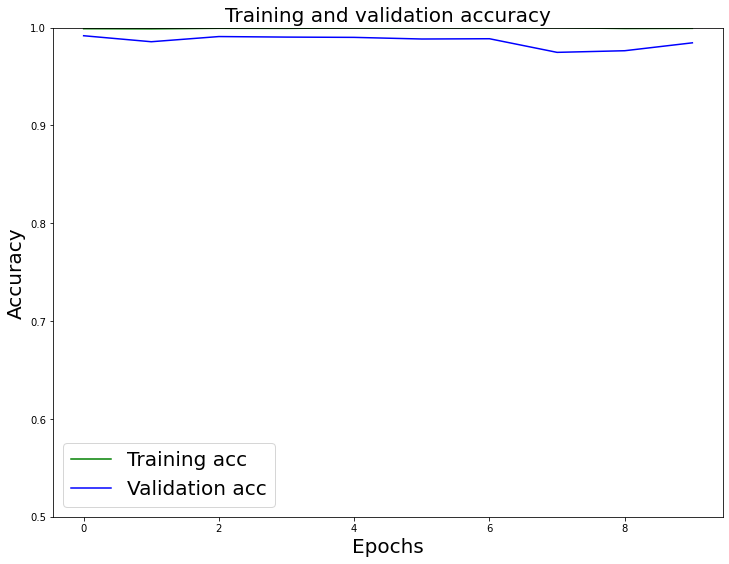

In [106]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [107]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 14s 51ms/step - loss: 0.0598 - accuracy: 0.9845


[0.05977475270628929, 0.9845107793807983]

In [108]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [111]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9845108090037887
Precision on testing set: 0.97308883067397
Recall on testing set: 0.9936770428015564


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

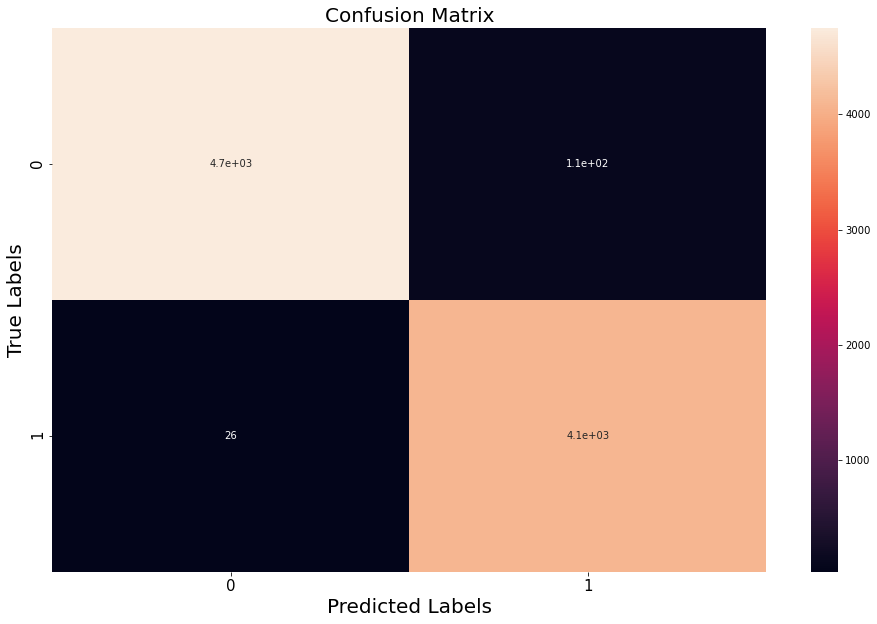

In [112]:
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)


## Usage of CNN

In [69]:
#train test split

X = news['text']
y = news['news type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


In [70]:
#write function to clean text data, set to lower case, remove extra spaces

def clean(data) :
    cleaned = []
    
    for i in data :
        i = i.lower()
        i = re.sub('https?://\S+|www\.\S+', '', i)
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        cleaned.append(i)
    return cleaned

X_train = clean(X_train)
X_test = clean(X_test)


In [71]:
#tokenize text
nwords = 10000
tokenizer = Tokenizer(num_words = nwords)
tokenizer.fit_on_texts(X_train)

In [72]:
#convert text to vectors, as the model only accepts numerical data

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [73]:
#add padding to achieve the same length for each article
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)


In [78]:
input_dim = X_train.shape[1]

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,581
Trainable params: 2,581
Non-trainable params: 0
_________________________________________________________________


In [87]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True)

Epoch 1/10
1077/1077 [==============================] - 189s 175ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0500 - val_accuracy: 0.9905
Epoch 2/10
1077/1077 [==============================] - 677s 629ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0680 - val_accuracy: 0.9880
Epoch 3/10
1077/1077 [==============================] - 155s 144ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0514 - val_accuracy: 0.9919
Epoch 4/10
1077/1077 [==============================] - 156s 144ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0500 - val_accuracy: 0.9897
Epoch 5/10
1077/1077 [==============================] - 155s 144ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0511 - val_accuracy: 0.9903
Epoch 6/10
1077/1077 [==============================] - 155s 144ms/step - loss: 6.7131e-04 - accuracy: 0.9999 - val_loss: 0.0542 - val_accuracy: 0.9916
Epoch 7/10
1077/1077 [==============================] - 154s 143ms/step - loss: 7.5289e-04 - accuracy: 0.999

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [68]:
nwords = 10000
tokenizer = Tokenizer(num_words = nwords)
tok_1 = tokenizer.fit_on_texts(X_train)
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 's': 7,
 'that': 8,
 'on': 9,
 'for': 10,
 'is': 11,
 'trump': 12,
 'said': 13,
 'he': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'they': 30,
 'an': 31,
 'i': 32,
 'but': 33,
 'we': 34,
 'president': 35,
 'would': 36,
 'u': 37,
 't': 38,
 'about': 39,
 'will': 40,
 'you': 41,
 'their': 42,
 'had': 43,
 'been': 44,
 'people': 45,
 'were': 46,
 'or': 47,
 'more': 48,
 'which': 49,
 'she': 50,
 'one': 51,
 'after': 52,
 'her': 53,
 'if': 54,
 'all': 55,
 'out': 56,
 'state': 57,
 'what': 58,
 'when': 59,
 'there': 60,
 'new': 61,
 'up': 62,
 'also': 63,
 'its': 64,
 'no': 65,
 'reuters': 66,
 'clinton': 67,
 'obama': 68,
 'over': 69,
 'donald': 70,
 'so': 71,
 'house': 72,
 'government': 73,
 'our': 74,
 'can': 75,
 'states': 76,
 'republican': 77,
 'him': 78,
 'than': 79,
 'other': 80,
 '